# Flight Price Prediction

In [408]:
#Import packages like pandas,numpy,matplotlib,seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [409]:
#Importing training data from excel stored in the local machine
df_train= pd.read_excel("Data_Train.xlsx")

In [410]:
#Displaying first 5 rows of training data
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [411]:
#Print info
#Training Data consists of 10 columns of object/string type and 1 column i.e price of integer type
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [412]:
#As there is only one numerical feature we got statistical information only for price column
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [413]:
#shape of data
#10683 rows and 11 columns
df_train.shape

(10683, 11)

In [414]:
#number of rows in the training data
len(df_train.index)

10683

In [415]:
#Finding sum of null values in all columns
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [416]:
#Check if all the entries within a row are null so that we can delete the entire row
df_train.isnull().all(axis=1).sum()

0

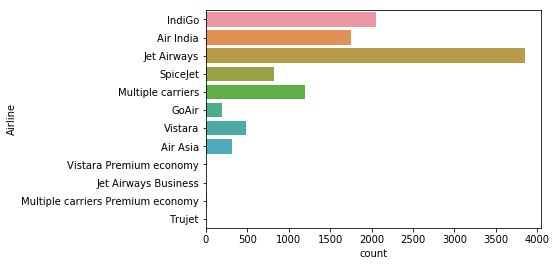

In [417]:
# Bar Chart for Flight Categories
sns.countplot(y=df_train["Airline"])

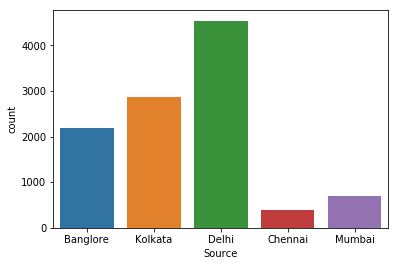

In [418]:
#Bar Chart for Source 
sns.countplot(x=df_train["Source"])

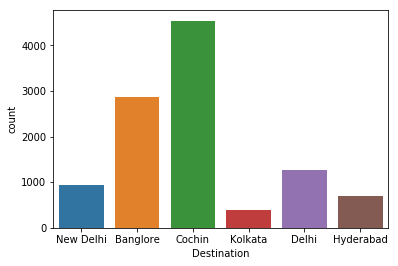

In [419]:
#Bar Chart for Destination
sns.countplot(x=df_train["Destination"])

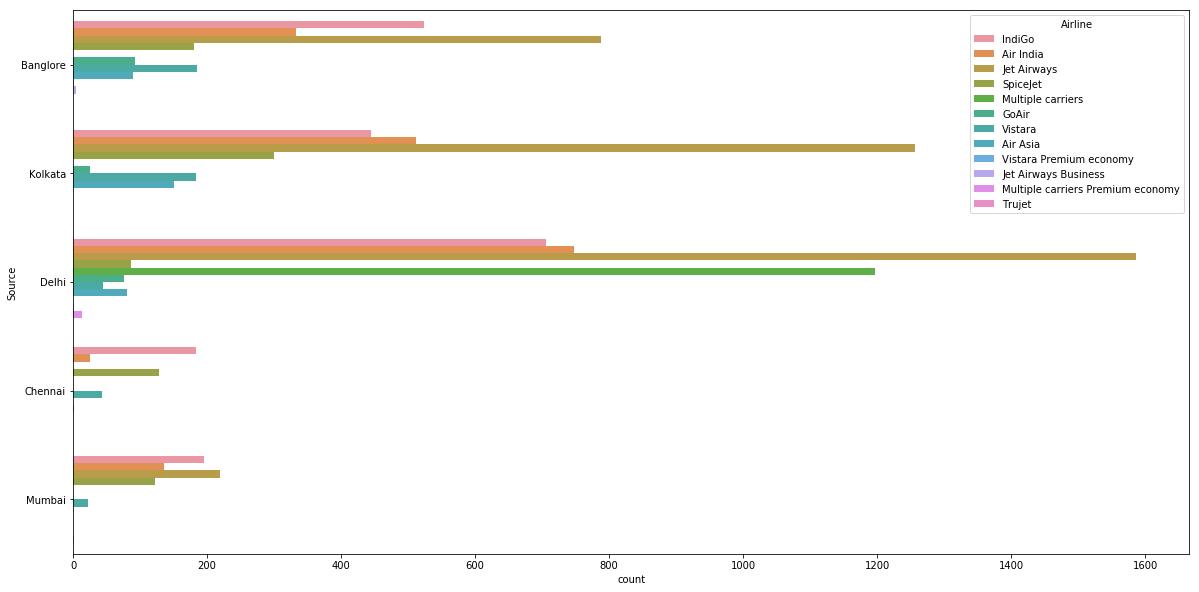

In [420]:
#Source wise Flight Categories 
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(y=df_train["Source"],hue=df_train["Airline"],ax=ax)

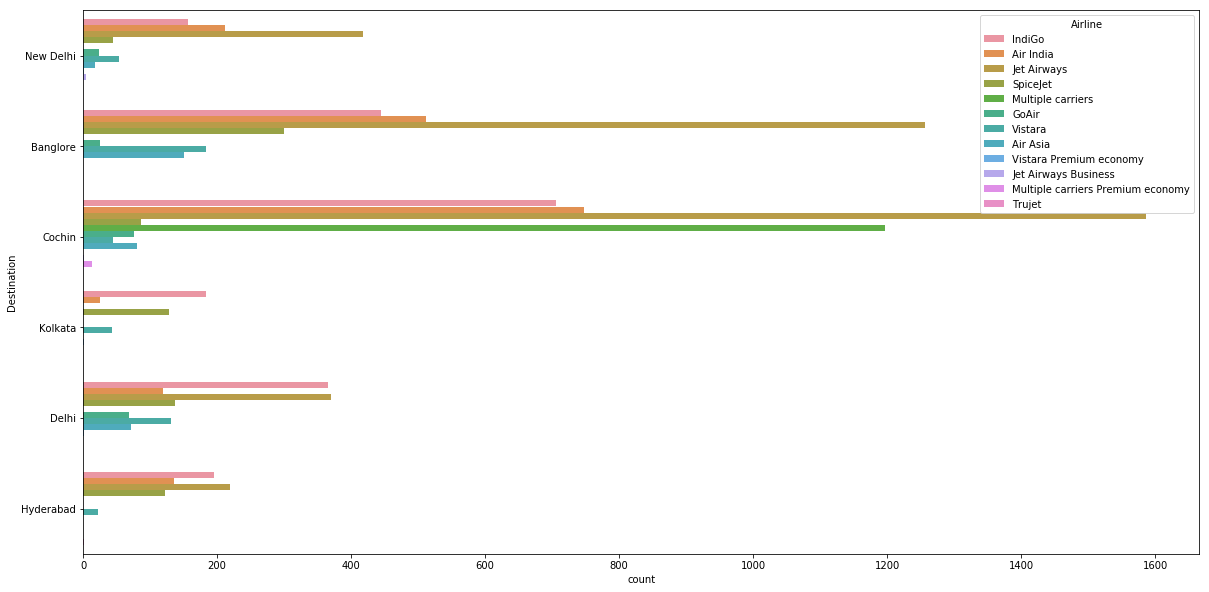

In [421]:
#Destination wise Flight Categories 
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(y=df_train["Destination"],hue=df_train["Airline"],ax=ax)

In [422]:
#Value Count of each Flight Category
df_train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [423]:
#Value Count of number of Flights from each Source
df_train["Source"].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [424]:
#Value Count of number of Flights to each Destination
df_train["Destination"].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [425]:
#Value Count of Duration.
#We can conclude that 550 flights have a duration of 2h 50m
df_train["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
3h         261
2h 20m     238
2h 30m     220
2h 40m     158
2h 15m     135
1h 25m     135
2h 25m      98
13h 30m     97
13h 20m     89
3h 15m      88
7h 30m      86
9h 30m      85
8h 40m      81
7h 15m      79
3h 5m       78
5h 30m      72
7h 35m      71
8h          68
7h 5m       65
9h 50m      64
9h          64
5h          63
11h         62
5h 15m      62
11h 45m     62
          ... 
32h 55m      1
31h 30m      1
27h 30m      1
35h 35m      1
37h 10m      1
19h 50m      1
29h 30m      1
35h 20m      1
30h 15m      1
33h 20m      1
30h 10m      1
5m           1
33h 45m      1
36h 25m      1
31h 50m      1
42h 45m      1
47h 40m      1
4h 10m       1
40h 20m      1
29h 40m      1
47h          1
13h 35m      1
27h 55m      1
41h 20m      1
3h 25m       1
29h 10m      1
28h 30m      1
30h 25m      1
32h 20m      1
42h 5m       1
Name: Duration, Length: 368, dtype: int64

In [426]:
#Value Count of Total Stops
#There are 5625 flights having 1 stop in between while reaching from source to destination
df_train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [427]:
#Value Count of Additional_Info Column
df_train["Additional_Info"].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

#### As we can see that 8345/10683 = 78.11% data has no information,hence we can drop this Additional_Info Column

In [428]:
#Dropping Additional_Info
df_train.drop(["Additional_Info"],axis=1,inplace=True)

In [429]:
#Displaying first 5 rows of the dataframe
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302


## Data Preprocessing 

In [430]:
#From the Date_of Journey Column, create a new column Journey_Day which is an integer 
df_train["Journey_Day"]=pd.to_datetime(df_train["Date_of_Journey"],format="%d/%m/%Y").dt.day

In [431]:
#From the Date_of Journey Column, create a new column Journey_Montg which is an integer 
df_train["Journey_Month"]=pd.to_datetime(df_train["Date_of_Journey"],format="%d/%m/%Y").dt.month

We will not extract the year from Date_of_Journey Column because all the 10683 rows belong to the year 2019.
Now we can drop the Date_of_journey column

In [433]:
#Dropping Date_of_Journey Column
df_train.drop(["Date_of_Journey"],axis=1,inplace=True)

In [434]:
#From the Dep_Time Column, create a new column Dep_Hour which is an integer 
df_train["Dep_Hour"]=pd.to_datetime(df_train["Dep_Time"]).dt.hour

In [435]:
#From the Dep_Time Column, create a new column Dep_Minute which is an integer 
df_train["Dep_Minute"]=pd.to_datetime(df_train["Dep_Time"]).dt.minute

In [436]:
#Dropping Dep_Time Column
df_train.drop(["Dep_Time"],axis=1,inplace=True)

In [437]:
# As we are considering Duration for the processing hence we can drop Arrival_time column because Duration=Arrival_Time-Dep_Time
df_train.drop(["Arrival_Time"],axis=1,inplace=True)

In [438]:
#As we have Total number of stops,hence we can remove the redundant information about the route  
df_train.drop(["Route"],axis=1,inplace=True)

In [439]:
# Assigning and converting Duration column into list
duration = list(df_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:   # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]         # Adds 0 hour 

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [440]:
# Adding duration_hours and duration_mins list to train_data dataframe
df_train["Duration_hours"] = duration_hours
df_train["Duration_mins"] = duration_mins

In [441]:
#Dropping Duration Column
df_train.drop(["Duration"],axis=1,inplace=True)

## Data Processing for Categorical Columns

#### As Airline Column consists of Nominal Data hence performing One hot Encoding for the same

In [442]:
#Creating Dummy variables for Airline Column
airline=pd.get_dummies(df_train["Airline"],drop_first=True)

In [443]:
#Concatinating the inital dataframe with the airline dummy variables
df_train=pd.concat([df_train,airline],axis=1)

In [444]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Duration_hours,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,2,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,7,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,19,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,5,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,4,...,0,1,0,0,0,0,0,0,0,0


In [445]:
#Creating Dummy variables for Source Column
source_dummies=pd.get_dummies(df_train["Source"],prefix='Source',drop_first=True)

In [446]:
#Concatinating the inital dataframe with the source dummy variables
df_train=pd.concat([df_train,source_dummies],axis=1)

In [447]:
#Creating Dummy variables for Destination Column and concatinating the inital dataframe with the destination dummy variables
destination_dummies=pd.get_dummies(df_train["Destination"],prefix='Destination',drop_first=True)
df_train=pd.concat([df_train,destination_dummies],axis=1)

In [448]:
#As we have created the dummy varaibles for Airline,Source & Destination so we can drop the actual Airline,Source & Destination Columns
df_train.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [449]:
#Value Count of Total_Stops Column
df_train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

#### As Total_Stops Column consists of ordinal data hence we are performing Label Encoding for the Total_Stops Column

In [450]:
#Replacing this Object values with the string values 
df_train.replace(to_replace=['1 stop','non-stop','2 stops','3 stops','4 stops'], value=["1","0","2","3","4"],inplace=True)

In [451]:
df_train.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Duration_hours,Duration_mins,Air India,GoAir,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,2,50,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,7,25,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,19,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,5,25,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,4,45,0,0,...,0,0,0,0,0,0,0,0,0,1


In [452]:
# As there is one NA value in the Total_Stops column replacing it with the mode of the column i.e 1
df_train['Total_Stops'].fillna(1,inplace=True)

In [453]:
#Converting the object type Total_Stops column to integer type Total_Stops Column
df_train['Total_Stops']=df_train['Total_Stops'].astype(int)

In [454]:
#All the columns are of the integer type
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 28 columns):
Total_Stops                          10683 non-null int32
Price                                10683 non-null int64
Journey_Day                          10683 non-null int64
Journey_Month                        10683 non-null int64
Dep_Hour                             10683 non-null int64
Dep_Minute                           10683 non-null int64
Duration_hours                       10683 non-null int64
Duration_mins                        10683 non-null int64
Air India                            10683 non-null uint8
GoAir                                10683 non-null uint8
IndiGo                               10683 non-null uint8
Jet Airways                          10683 non-null uint8
Jet Airways Business                 10683 non-null uint8
Multiple carriers                    10683 non-null uint8
Multiple carriers Premium economy    10683 non-null uint8
SpiceJet             

In [455]:
# Now the processed data consists of 28 columns
df_train.shape

(10683, 28)

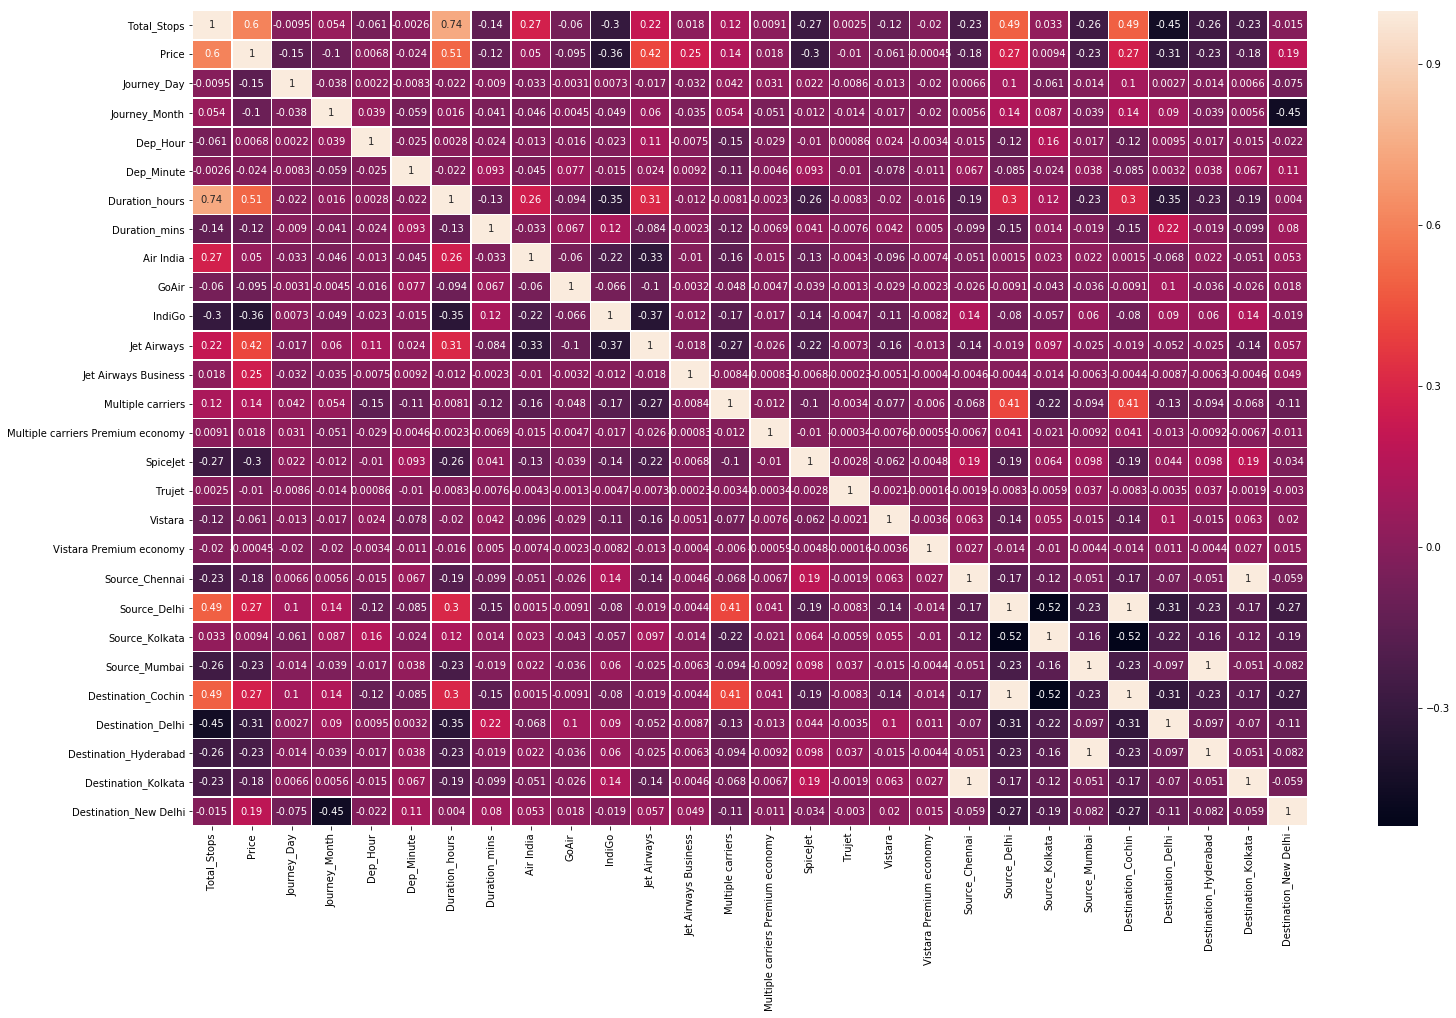

In [456]:
#Correlation Matrix in the form of heatmap
fig,ax = plt.subplots(figsize=(25,15))
corr=df_train.corr()
sns.heatmap(corr,ax=ax,annot=True,linewidth=.5)

In [457]:
#List of 28 columns available
df_train.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Minute', 'Duration_hours', 'Duration_mins', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [458]:
#Rearranging the features as per Independent and Dependent Features
df_train=df_train[['Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi','Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Minute', 'Duration_hours', 'Duration_mins','Total_Stops','Price']]

In [459]:
#Displaying the first five rows of the processed data
df_train.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination_Kolkata,Destination_New Delhi,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Duration_hours,Duration_mins,Total_Stops,Price
0,0,0,1,0,0,0,0,0,0,0,...,0,1,24,3,22,20,2,50,0,3897
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,5,5,50,7,25,2,7662
2,0,0,0,1,0,0,0,0,0,0,...,0,0,9,6,9,25,19,0,2,13882
3,0,0,1,0,0,0,0,0,0,0,...,0,0,12,5,18,5,5,25,1,6218
4,0,0,1,0,0,0,0,0,0,0,...,0,1,1,3,16,50,4,45,1,13302


In [460]:
# Exporting this processed data to a csv file using to_csv 
df_train.to_csv("Final_Data.csv",index=False)